# RA2CE basics: set up RA2CE and configure a road network

This notebook contains examples for the RA2CE model. This notebook should be used in combination with the 'examples' data folder, which contains pre-processed data. A user could create their own examples, using the RA2CE functionality of their interest. This requires the right folder setup, and the correct settings in the configuration files (network.ini and analyses.ini).

In this notebook, we will guide you through the basics of RA2CE: configuring a road network from OSM. 

First of all, we will import the packages we need to execute this notebook:

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path

Then, we have to set some basic variables. Keep in mind that you will have to specify the path to your local machine yourself.
First, we will set the path to the ra2ce folder and we will initialize the name for the network.ini file.

Afterwards, let's find the examples folder on your machine.

In [3]:
from ra2ce.ra2ce_handler import Ra2ceHandler # import the ra2cehandler to run ra2ce analyses

_network_ini_name = "network.ini" # set the name for the network.ini settings file

folder_dir = Path(r'D:\examples_ra2ce_pizzacourse\examples_pizzacourse') # set the path to your examples folder

# Folder structure

Before starting the examples, it is vital that you familiarize yourself with the RA2CE folder structure. RA2CE requires this folder structure to succesfully perform analyses. You can find the folder structure in the **documentation**.


A project folder must contain the subfolders output and static. An 'input' folder is optional for additional data sets but we will not use that in our example. It must also contain the network.ini and/or analyses.ini files. Within the subfolder static, RA2CE expects three subfolders: hazard, network, and output_graph. See below an example folder structure of “Project A”. This folder structure must be created and filled with data by the user before running RA2CE.

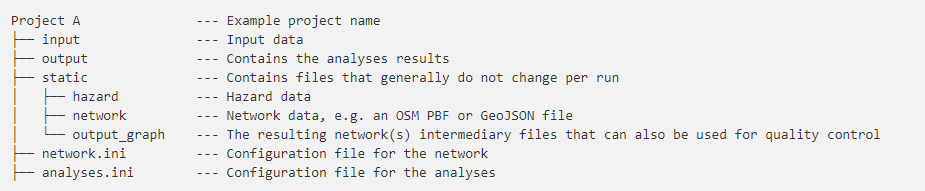

For this example notebook, an example folder is available with the correct folder structures. 

## Configuring RA2CE to create a road network from OSM

One of the RA2CE functionalities is extracting road networks from OpenStreetMaps (OSM)* for any place in the world. You can do this, by creating a polygon of the area you would like to extract the road network from.

An easy way to use this option is by drawing a polygon at the location of choice at [geojson.io](http://geojson.io/). 
Another option is creating a polygon layer in a GIS and saving it as a *.geojson*.

Bear in mind that RA2CE requires a polygon in *.geojson* format and that the projection should be set to **WGS84 EPSG:4326**.

The created polygon should be saved in the **static/network** folder.


**OSM files are usually neater because they are checked before uploading. These files usually have a good (realistic) connectivity, but still it is required to check the network carefully.*  

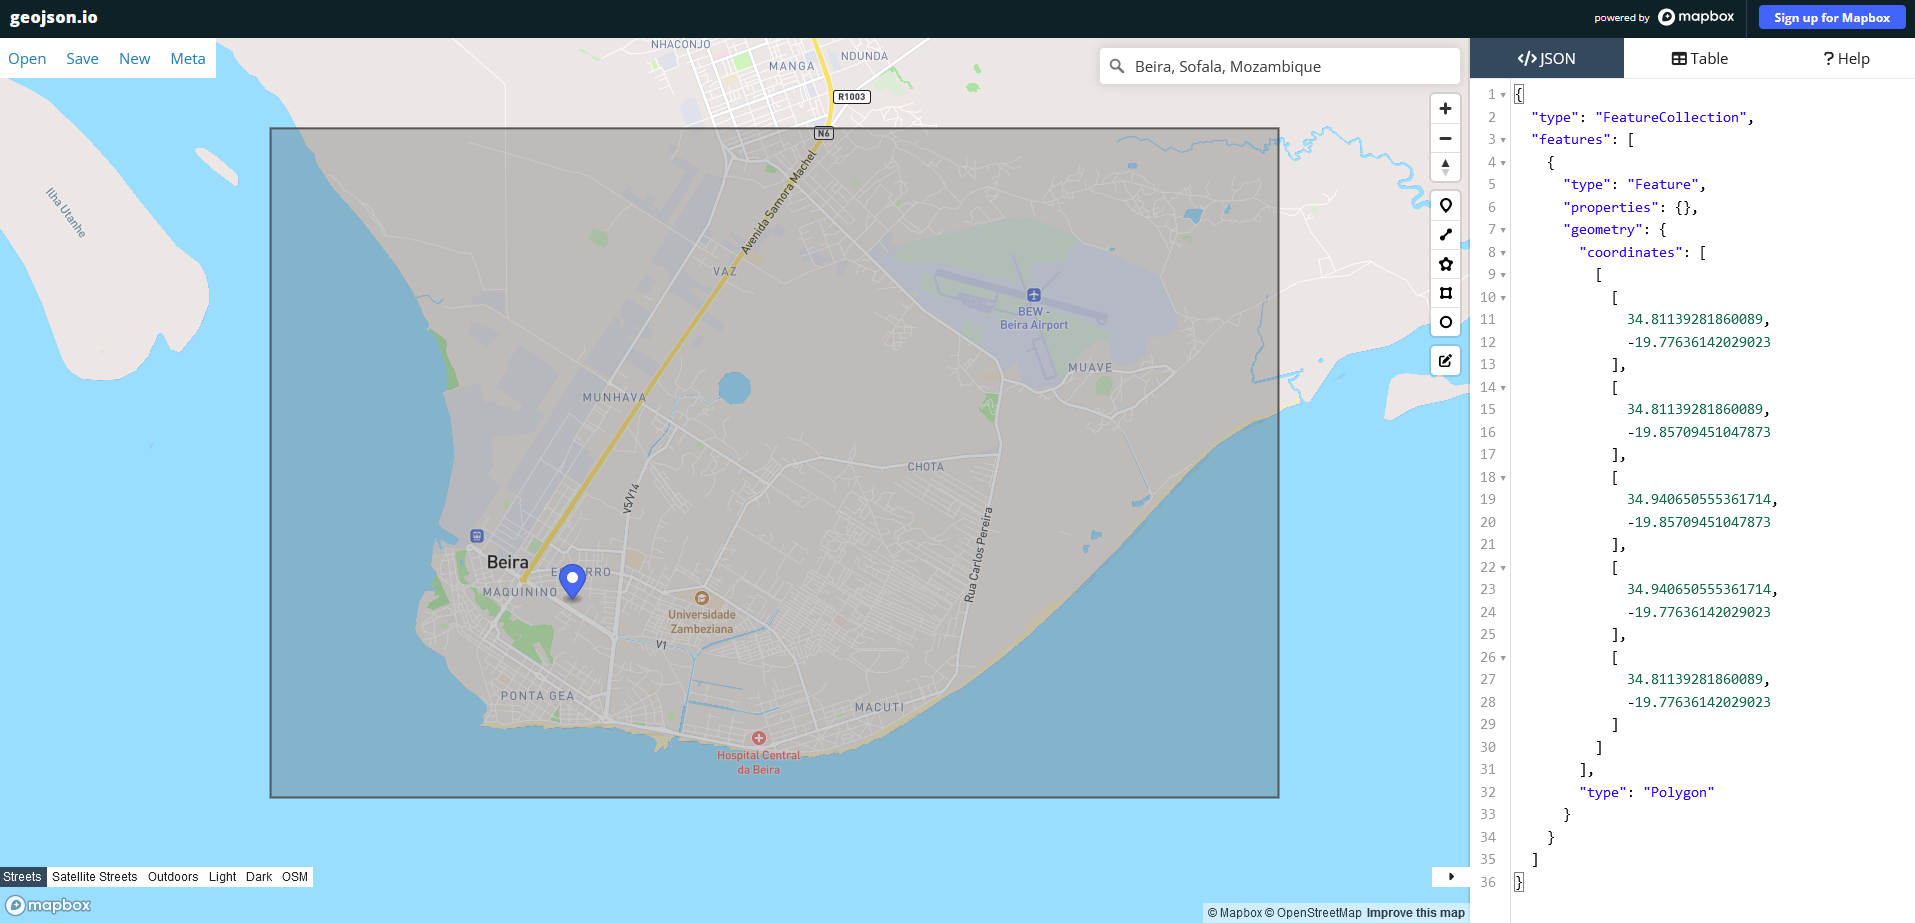

### Filling the network.ini file
Now, we will fill the *network.ini* file with our configurations.

Under [project], we simply specify the *project name*, in this case 'beira'.

We then move on to the [network] section, where we will first mention the most important settings for this example. First, we specify the **source** of road network extraction. In the case of downloading from OSM, using a *.geojson* polygon, you want to perform an **OSM download** (source = OSM download). Specify the file's name in the **'polygon' parameter** in the **network.ini** file in the [network] section. Here, you specify the name of your created *.geojson* polygon, which you have saved in the network folder that belongs to your project.

With the **road_types** parameter, you can specify the types of roads (motorway - residential) you want to extract from OSM. Bear in mind that the more road types you include, the more larger your road network will be. This can increase download and computational time but can also increase the connectivity of your road network.

Some other important settings in the [network] section are:
- **directed**: Used together with OSM download - False if you want to have an undirected graph and True if you want to have a directed graph.
- **primary_file**: Used to specify the shapefile name of the (road) network to do the analysis with, when creating a network from a shapefile.
- **diversion_file**: Used to specify a shapefile name of the (road) network to only use for diversion (i.e., no analysis), when creating a network from a shapefile.
- **file_id**: The field name in the shapefile/OSM data that holds the unique ID of the data. When this ID attribute is not unique, RA2CE will create a new attribute in the data with the name 'rfid_c' (RA2CE feature ID complex) that contains the unique ID. For more information, the documentation on this is coming soon...
- **network_type**: The type of network to download from OSM, in the case of road networks, this is must be set to *'drive'*.
- **save_shp**: True if you want to save the shapefile of the resulting road network in the *output_graph* folder.

The other settings [origins_destinations], [hazard], and [cleanup], are not relevant for this example and will be introduced in other examples.

> [project]<br>
name = beira<br>
<br>
[network]<br>
directed = False<br>
**source = OSM download<br>**
primary_file = None<br>
diversion_file = None<br>
file_id = rfid_c<br>
**polygon = Extent_Network_wgs84.geojson<br>**
network_type = drive<br>
**road_types = motorway,motorway_link,primary,primary_link,secondary,secondary_link,tertiary,tertiary_link,residential<br>**
save_shp = True<br>
<br>
*[origins_destinations]<br>
origins = None<br>
destinations = None<br>
origins_names = A<br>
destinations_names = B<br>
id_name_origin_destination = OBJECTID<br>
origin_count = PEOPLE<br>
origin_out_fraction = 1<br>
<br>
[hazard]<br>
hazard_map = None<br>
hazard_id = None<br>
hazard_field_name = waterdepth<br>
aggregate_wl = max<br>
hazard_crs = None $EPSG:4326 <br>
<br>
[cleanup]<br>
snapping_threshold = None <br>
segmentation_length = None <br>
merge_lines = True <br>
merge_on_id = False <br>
cut_at_intersections = False <br>*

Now, we tell the program where to find our project folder (by specifying the path to the project folder). Now that we introduced a polygon of a region, we specified the road types and that we want an OSM download, RA2CE can perform this action for us. For this action we only need the network.ini file, no analysis.ini file is needed.

In [5]:
root_dir = folder_dir / "beira_graph_configuration" # specify the path to the project folder in the examples folder
network_ini = root_dir / _network_ini_name # we set the _network_ini_name before, so we can use this now for the project
assert network_ini.is_file() # check whether the network.ini file exists

## Creating the network with RA2CE
Initiate the RA2CE model through the Ra2ceHandler and configure (create) the network. Because we do not input the analysis.ini for now, we set that to *None*.

In [6]:
handler = Ra2ceHandler(network=network_ini, analysis=None)
handler.configure()

2023-06-26 10:08:06 AM - [ra2ce_logging.py:41] - root - INFO - RA2CE logger initialized.
2023-06-26 10:08:06 AM - [network_config.py:118] - root - INFO - Existing graph/network found: D:\examples_ra2ce_pizzacourse\examples_pizzacourse\beira_graph_configuration\static\output_graph\base_graph.p.
2023-06-26 10:08:06 AM - [network_config.py:118] - root - INFO - Existing graph/network found: D:\examples_ra2ce_pizzacourse\examples_pizzacourse\beira_graph_configuration\static\output_graph\base_network.feather.
2023-06-26 10:08:06 AM - [networks.py:615] - root - INFO - Apparently, you already did create a network with ra2ce earlier. Ra2ce will use this: D:\examples_ra2ce_pizzacourse\examples_pizzacourse\beira_graph_configuration\static\output_graph\base_graph.p


## Inspecting the resulting network
Now, let's inspect the created network. Note: the road network is always saved in the static/output_graph folder.<br> 

First, we load the right geopackage. There are many geopackages created in the static / output_graph folder. These all represent some properties of the network. Let's inspect some of these.

*Notice the different files in the output_graph folder. You can inspect them all and see what their differences are.* 

In [7]:
# Set the path to your output_graph folder to find the network/graph creation:
path_output_graph = root_dir / "static" / "output_graph"

In [8]:
# Now we find and inspect the file 'base_graph_edges.gpkg' which holds the 'edges' of the network. 
# An edge (or link) of a network (or graph) represents a connection between two nodes (or vertices) of the network. More information on: https://mathinsight.org/definition/network_edge#:~:text=An%20edge%20(or%20link)%20of,in%20the%20first%20figure%20below.
base_graph_edges = path_output_graph / "base_graph_edges.gpkg"
edges_gdf = gpd.read_file(base_graph_edges, driver = "GPKG")
edges_gdf.head()

osmid                       name      highway maxspeed  \
0               820923407  Ava Mártires da Revolução     tertiary       60   
1                44785078                        nan     tertiary      nan   
2                44785077                        nan     tertiary      nan   
3               326208102                        nan  residential      nan   
4  [839392844, 839392845]         Rua Carlos Pereira    secondary       60   

   oneway  length                                     rfid_c  rfid  avgspeed  \
0   False    70.0                                       1764  1209      60.0   
1    True    70.0                             [80, 1, 10916]     2      59.0   
2    True    71.0                            [10917, 79, 47]    19      59.0   
3   False   132.0                         [3712, 3809, 3775]  2274      60.0   
4   False   754.0  [11256, 3893, 21, 11224, 11258, 27, 5791]     7      60.0   

   time junction bridge lanes  ref          u           v  key  \
0   4.0      nan    nan   nan  nan  567924681  1934771035    0   
1   4.0      nan    nan   nan  nan  567924681  4095037852    0   
2   4.0      nan    nan   nan  nan  567924681   567929920    0   
3   8.0      nan    nan   nan  nan  567924698  3328284864    0   
4  45.0      nan    nan   nan  nan  567924698   567924713    0   

                                            geometry  
0  LINESTRING (34.87673 -19.85047, 34.87737 -19.8...  
1  LINESTRING (34.87673 -19.85047, 34.87642 -19.8...  
2  LINESTRING (34.87606 -19.85055, 34.87628 -19.8...  
3  LINESTRING (34.89312 -19.79809, 34.89331 -19.7...  
4  LINESTRING (34.89980 -19.80126, 34.89942 -19.8...

Notice how the road network that is downloaded holds the attributes of all these road types that are specified in the network.ini: *motorway, motorway_link, primary, primary_link, secondary, secondary_link, tertiary, tertiary_link, and residential*.

If you want to customize this yourself, you can pick the type of roads you are interested in by choosing from this list. For example, using only motorway and motorway_link.

In [9]:
edges_gdf.explore(column='highway', tiles="CartoDB positron")

*If you want to get a bit more advanced, use the 'Disconnected Islands' plugin in QGIS to check whether the road network is completely connected. If there are disconnected islands in the road network, this can impact more advanced RA2CE analyses (such as Origin-Destination analyses which are introduced in another example)*.

Now we find and inspect the file 'base_graph_nodes.gpkg' which holds the 'nodes' of the network. A node is represents the beginning and end point of an edge and can connect to one or multiple edges. Together, the nodes and edges make up the graph/network.

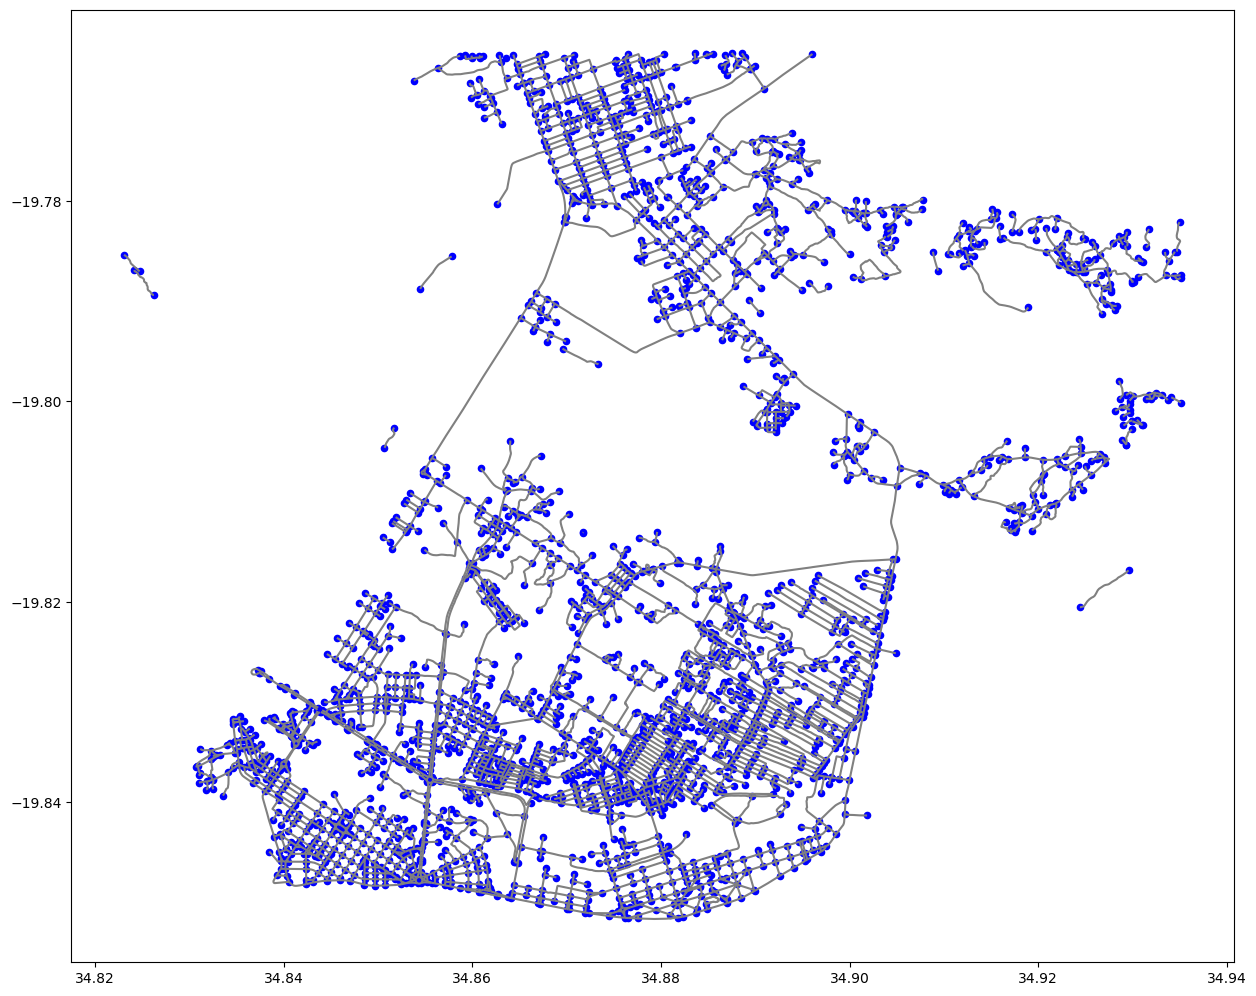

In [11]:
base_graph_nodes = path_output_graph / "base_graph_nodes.gpkg" #specify where to find the nodes file
nodes_gdf = gpd.read_file(base_graph_nodes, driver = "GPKG") #read in the nodes file

#Plotting nodes and edges together
fig, ax = plt.subplots(figsize=(15, 15))  # Set the figsize as desired

# Set the edges as the base plot
baseplot = edges_gdf.plot(ax=ax, color='grey')
nodes_gdf.plot(ax=baseplot, color='blue', markersize=20)
plt.show()


## Advanced
If you want to further inspect the network and it's properties, load the files in the *output_graph* folder into QGIS and explore!

To check whether the OSM data is complete and up-to-date, overlay the roads with a (recent) satellite image or use Google Earth. Where does the data match and where not?